### 최종 실습 프로젝트
- ecommerce_sales_data.csv 파일 활용

당신은 한 온라인 쇼핑몰의 데이터 분석가로 고용되었다. 쇼핑몰의 판매 데이터를 분석하여 고객의 구매 패턴을 파악하고, 중요한 인사이트를 도출하는 것이 이번 프로젝트의 목표다. 이를 통해 향후 마케팅 전략을 제시하고자 한다. ecommerce_sales_data.csv 파일을 통해 주어진 데이터는 고객의 주문 기록, 상품 정보, 판매 데이터 등을 포함하고 있다. 주어진 데이터를 분석하여 아래의 질문에 답하라.

- **데이터 설명**:
    - **OrderID**: 주문 ID
    - **Product**: 주문한 상품 이름
    - **Category**: 상품의 카테고리 (예: Electronics, Clothing 등)
    - **Quantity**: 주문 수량
    - **Price**: 상품의 가격
    - **CustomerID**: 고객 ID
    - **BirthDate**: 고객 생일
    - **OrderDate**: 주문 날짜
    - **Country**: 주문한 고객의 국가

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


df = pd.read_csv('./data/ecommerce_sales_data.csv')
df

,OrderID,Product,Category,Quantity,Price,CustomerID,Birthdate,OrderDate,Country,DiscountRate
0,1,역사책,Books,5,37000,1071,1980-08-08,2024-06-10 17:18,미국,0.14
1,2,셔츠,Clothing,5,20000,1526,1967-08-09,2023-11-18 18:45,독일,0.29
2,3,노트북,Electronics,4,8000,1252,1973-04-07,2023-10-15 11:19,중국,0.23
3,4,자전거,Sports,1,8000,1670,1970-04-08,2024-07-19 2:19,일본,0.20
4,5,헤드폰,Electronics,3,26000,1838,1992-05-19,2024-01-20 20:34,대한민국,0.09
...,...,...,...,...,...,...,...,...,...,...
115,116,스마트워치,Electronics,1,33000,1508,1971-01-02,2024-03-01 16:57,독일,0.20
116,117,스마트워치,Electronics,4,41000,1645,1975-03-15,2024-01-18 21:37,대한민국,0.09
117,118,태블릿,Electronics,1,33000,1433,1965-02-01,2024-09-29 12:27,독일,0.09
118,119,청바지,Clothing,2,43000,1497,1980-04-02,2024-06-10 9:01,독일,0.06


1. **데이터 탐색 및 전처리**
    1. 데이터셋을 로드하고 상위 5개의 데이터를 출력하세요.
    2. 결측값이 있는 열이 있는지 확인하고, 결측값이 있는 경우 적절한 방법으로 처리하세요.
    3. 각 열의 데이터 타입을 확인하고, **OrderDate** 열을 datetime 형식으로 변환하세요.

In [6]:
# 1
top_5 = df.head(5)
print(top_5)

# 2 결측값 -> DiscountRate 1개 : 0으로 채우기
df.info()
df['DiscountRate'] = df['DiscountRate'].fillna(0)
df.info()

# 3
df.describe()
df['OrderDate'] = pd.to_datetime(df['OrderDate'])


   OrderID Product     Category  Quantity  Price  CustomerID   Birthdate  \
0        1     역사책        Books         5  37000        1071  1980-08-08   
1        2      셔츠     Clothing         5  20000        1526  1967-08-09   
2        3     노트북  Electronics         4   8000        1252  1973-04-07   
3        4     자전거       Sports         1   8000        1670  1970-04-08   
4        5     헤드폰  Electronics         3  26000        1838  1992-05-19   

          OrderDate Country  DiscountRate  
0  2024-06-10 17:18      미국          0.14  
1  2023-11-18 18:45      독일          0.29  
2  2023-10-15 11:19      중국          0.23  
3   2024-07-19 2:19      일본          0.20  
4  2024-01-20 20:34    대한민국          0.09  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120 entries, 0 to 119
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   OrderID       120 non-null    int64  
 1   Product       120 non-null    object 
 2

2. **매출 분석**
    1. **매출액**(총 판매 금액)을 계산하는 새로운 열 `TotalRevenue`를 생성하세요.
        - 매출액 = `Quantity` * `Price`
    2. 월별 총 매출액을 집계하여 시각화하세요.
        - 힌트: `resample()`을 사용하여 월별로 데이터를 집계하세요.
    3. 카테고리별로 매출액이 가장 높은 상위 3개의 카테고리를 구하세요.
    4. 국가별 총 매출액을 계산하고, 매출액이 가장 높은 5개 국가를 출력하세요.

In [7]:
# 1
df['TotalRevenue'] = df['Quantity'] * df['Price']
df

,OrderID,Product,Category,Quantity,Price,CustomerID,Birthdate,OrderDate,Country,DiscountRate,TotalRevenue
0,1,역사책,Books,5,37000,1071,1980-08-08,2024-06-10 17:18:00,미국,0.14,185000
1,2,셔츠,Clothing,5,20000,1526,1967-08-09,2023-11-18 18:45:00,독일,0.29,100000
2,3,노트북,Electronics,4,8000,1252,1973-04-07,2023-10-15 11:19:00,중국,0.23,32000
3,4,자전거,Sports,1,8000,1670,1970-04-08,2024-07-19 02:19:00,일본,0.20,8000
4,5,헤드폰,Electronics,3,26000,1838,1992-05-19,2024-01-20 20:34:00,대한민국,0.09,78000
...,...,...,...,...,...,...,...,...,...,...,...
115,116,스마트워치,Electronics,1,33000,1508,1971-01-02,2024-03-01 16:57:00,독일,0.20,33000
116,117,스마트워치,Electronics,4,41000,1645,1975-03-15,2024-01-18 21:37:00,대한민국,0.09,164000
117,118,태블릿,Electronics,1,33000,1433,1965-02-01,2024-09-29 12:27:00,독일,0.09,33000
118,119,청바지,Clothing,2,43000,1497,1980-04-02,2024-06-10 09:01:00,독일,0.06,86000


In [10]:
# 2

df['OrderDate'] = pd.to_datetime(df['OrderDate'])
monthly_sales = df.resample('M', on='OrderDate')['totalRevenue'].sum()


# # 1. 날짜 데이터 변환 및 인덱스 설정
# df['OrderDate'] = pd.to_datetime(df['OrderDate'])  # 날짜 형식 변환
# df.set_index('OrderDate', inplace=True)  # OrderDate를 인덱스로 설정

# # 2. 월별 매출액 집계
# monthly_sales = df['TotalRevenue'].resample('M').sum()

# 3. 시각화
plt.figure(figsize=(10, 6))
monthly_sales.plot(kind='line', marker='o', title='Monthly Total Revenue', color='skyblue')
plt.xlabel('Month')
plt.ylabel('Total Revenue')
plt.grid(True)
plt.tight_layout()
plt.show()


C:\Users\Playdata\AppData\Local\Temp\ipykernel_11672\2504958430.py:4: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_sales = df.resample('M', on='OrderDate')['totalRevenue'].sum()


KeyError: 'Column not found: totalRevenue'

In [97]:
# 3
category = df.groupby('Category')['TotalRevenue'].sum()
top_3 = category.sort_values(ascending=False).head(3)
print(top_3)

Category
Food           1966000
Electronics    1746000
Beauty         1493000
Name: TotalRevenue, dtype: int64


In [98]:
# 4
countries = df.groupby('Country')['TotalRevenue'].sum()
top_5_countries = countries.sort_values(ascending=False).head(5)
print(top_5_countries)

Country
미국      2238000
독일      1973000
중국      1766000
일본      1523000
대한민국    1419000
Name: TotalRevenue, dtype: int64


3. **고객 분석**
    1. 고객별로 총 매출액을 계산한 후, 상위 5명의 고객을 출력하세요.
    2. 주문 횟수가 가장 많은 상위 5명의 고객을 출력하세요.
    3. **연령대**에 따라 고객을 분류하고, 각 연령대별로 가장 많이 구매한 상품의 카테고리를 구하세요.
        - 힌트: 고객의 연령대는 따로 제공되지 않으므로, 가정 데이터를 추가해 임의로 분류할 수 있습니다.

In [99]:
# 1
id_order = df.groupby('CustomerID')['TotalRevenue'].sum()
top_5 = id_order.sort_values(ascending=False).head(5)

print(top_5)

CustomerID
1007    334000
1354    245000
1141    241000
1589    215000
1632    192000
Name: TotalRevenue, dtype: int64


In [100]:
# 2
most_order = df.groupby('CustomerID').size()
top_5_order = most_order.sort_values(ascending=False).head(5)
print(top_5_order)


CustomerID
1007    2
1038    2
1141    2
1278    2
1421    2
dtype: int64


In [163]:
# 3
from datetime import datetime

df['Age'] = datetime.now().year - pd.to_datetime(df['Birthdate']).dt.year

def age_group(age):
    if age < 20:
        return '10대 이하'
    elif age < 30:
        return '20대'
    elif age < 40:
        return '30대'
    elif age < 50:
        return '40대'
    elif age < 60:
        return '50대'
    else:
        return '60대 이상'

df['AgeGroup'] = df['Age'].apply(age_group)

category_sales_by_agegroup = df.groupby(['AgeGroup', 'Category'])['Quantity'].sum()

top_categories_by_agegroup = category_sales_by_agegroup.groupby(level=0).idxmax()
top_categories_by_agegroup.name = 'Top Category'

result = category_sales_by_agegroup.loc[top_categories_by_agegroup]
print(result)



AgeGroup  Category
20대       Food        15
30대       Food        30
40대       Books       26
50대       Clothing    23
60대 이상    Beauty       5
Name: Quantity, dtype: int64


4. **상품 분석**
    1. 가장 많이 판매된 상위 5개의 상품을 출력하세요.
    2. **카테고리별**로 가장 많이 판매된 상품을 찾아 출력하세요.
    3. **평균 구매 수량**이 가장 높은 상위 3개의 상품을 출력하세요.

In [102]:
# 1
product = df.groupby('Product')['Quantity'].sum()
product_top_5 = product.sort_values(ascending=False).head(5)
print(product_top_5)

Product
셔츠     25
립스틱    22
소설     21
커피     20
역사책    20
Name: Quantity, dtype: int64


In [103]:
# 2
products_sum = df.groupby(['Category', 'Product'])['Quantity'].sum().reset_index()
top_products = products_sum.sort_values(['Category', 'Quantity'], ascending=False).drop_duplicates('Category')
print(top_products)

# df['Category'].drop_duplicates()

       Category Product  Quantity
25       Sports    요가매트        12
23         Food      커피        20
14  Electronics     노트북        15
10     Clothing      셔츠        25
7         Books      소설        21
1        Beauty     립스틱        22


In [104]:
# 3
avg_qty_product = df.groupby('Product')['Quantity'].mean()
top_3_products = avg_qty_product.sort_values(ascending=False).head(3)
print(top_3_products)

Product
주스      5.0
자기계발    5.0
요가매트    4.0
Name: Quantity, dtype: float64


5. **시간 분석**
    1. 주문 날짜별로 **주별** 매출액을 계산하고 시각화하세요.
    2. 특정 기간(예: 2024년 1월 ~ 2024년 6월) 동안의 매출 추이를 분석하고 시각화하세요.
    3. 특정 국가에서 가장 많이 주문한 시간대를 분석하고, 이를 시각화하여 인사이트를 도출하세요.

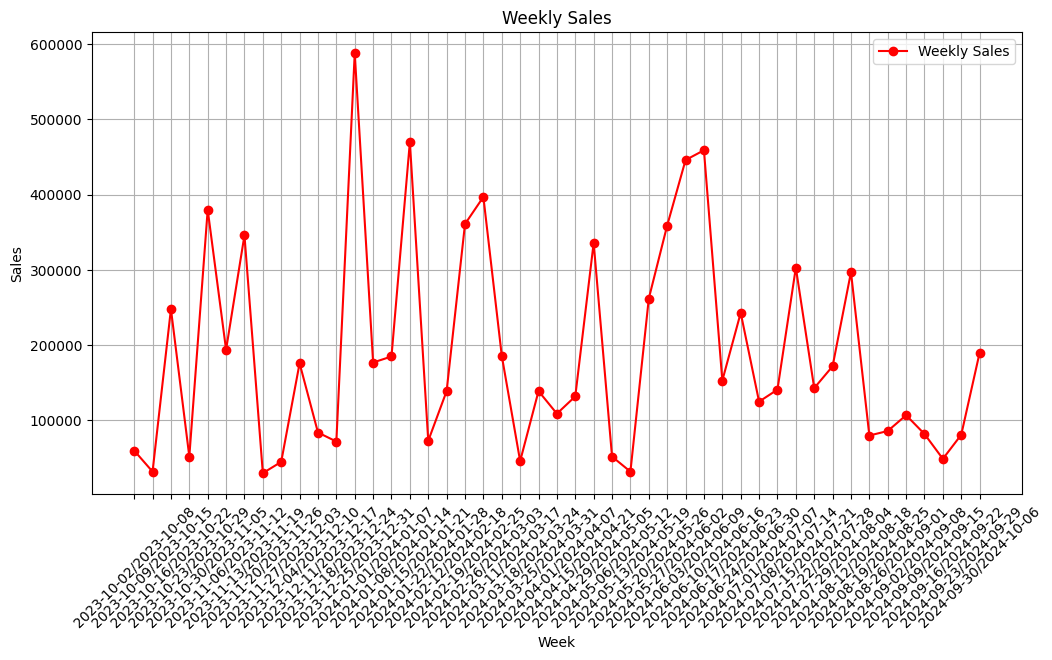

In [116]:
# 1

# 주별 매출
df['Week'] = df['OrderDate'].dt.to_period('W')
weekly_sales_2 = df.groupby('Week')['TotalRevenue'].sum()
# print(weekly_sales_2)

# 그래프 출력
plt.figure(figsize=(12, 6))
weekly_sales_2.index = weekly_sales_2.index.astype(str)
plt.plot(weekly_sales_2.index, weekly_sales_2.values, marker='o', label='Weekly Sales', color='r')
plt.xticks(rotation=45)
plt.title('Weekly Sales')
plt.xlabel('Week')
plt.ylabel('Sales')
plt.grid(True)
plt.legend()
plt.show()


Month
2024-01     905000
2024-02     565000
2024-03     703000
2024-04     288000
2024-05     930000
2024-06    1365000
Freq: M, Name: TotalRevenue, dtype: int64


C:\Users\Playdata\AppData\Local\Temp\ipykernel_38896\3556498878.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  jan_to_jun['Month'] = jan_to_jun['OrderDate'].dt.to_period('M')


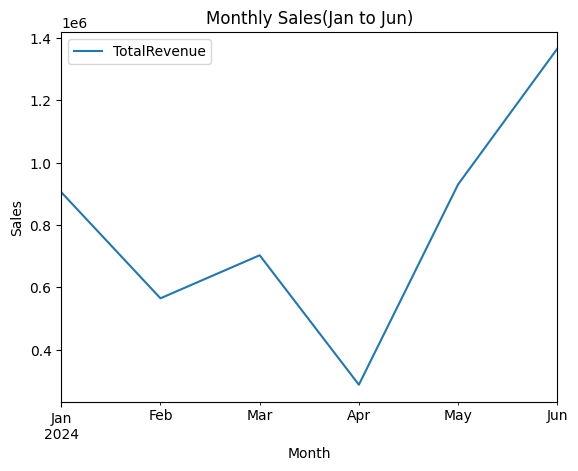

In [ ]:
# 2
# 월별 매출액
jan_to_jun = df[(df['OrderDate'] >= '2024-01-01') & (df['OrderDate'] <= '2024-06-30')]
jan_to_jun['Month'] = jan_to_jun['OrderDate'].dt.to_period('M')
monthly_sales = jan_to_jun.groupby('Month')['TotalRevenue'].sum()
print(monthly_sales)

# 그래프 출력
monthly_sales.plot(kind='line', title='Monthly Sales(Jan to Jun)')
plt.xlabel('Month')
plt.ylabel('Sales')
plt.legend()
plt.show()



C:\Users\Playdata\AppData\Local\Temp\ipykernel_38896\343699997.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  america['OrderTime'] = america['OrderDate'].dt.hour


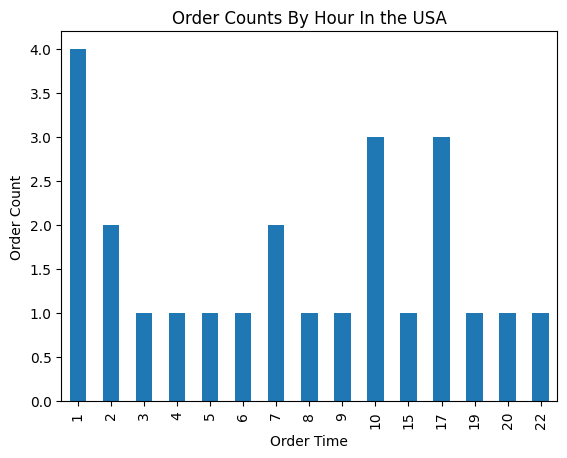

In [162]:
# 3
america = df[df['Country'] == '미국']

america['OrderTime'] = america['OrderDate'].dt.hour

time_sales = america.groupby('OrderTime').size()

time_sales.plot(kind='bar', title='Order Counts By Hour In the USA')
plt.xlabel('Order Time')
plt.ylabel('Order Count')
plt.show()


## insight
## 새벽 시간대에 주문량이 가장 높으므로 특가 행사 진행 등의 프로모션 기획


6. **추가 분석**
    1. 고객의 **재구매율**을 분석하세요.
        - 재구매율 = 한 고객이 여러 번 주문한 비율
    2. 상품 카테고리별 **할인**을 적용한 판매 데이터를 사용하여 할인율이 높은 카테고리의 매출액을 분석하세요.

In [145]:
# 1
customer_list = df.groupby('CustomerID')['OrderID'].count()
re_order = customer_list[customer_list > 1].count()
# print(re_order)
total_order = customer_list.count()

re_order_rate = re_order / total_order * 100
print(re_order_rate)


8.108108108108109


In [161]:
# 2
category_sales = df.groupby('Category')['TotalRevenue'].sum()
avg_category_discount = df.groupby('Category')['DiscountRate'].mean()
discount_rate = avg_category_discount * 100


# discounted_amount = category_sales * category_discount_rate
# print(discounted_amount)

